In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/sylva/AppData/Local/GitHubDesktop/app-3.2.0/Projet_ARIMA/French energy consumption dataset.csv', sep=';')
data

,operateur,annee,filiere,code_categorie_consommation,libelle_categorie_consommation,code_grand_secteur,libelle_grand_secteur,code_naf,libelle_secteur_naf2,conso,pdl,indqual,nombre_mailles_secretisees,code_region,libelle_region
0,Régie intercommunale d'électricité de Niederbr...,2021,Electricité,PRO,Petits professionels,A,Agriculture,NaN,0,115.36200,9,0.49100,0,44,Grand Est
1,Régie Municipale Bazas-Energies,2021,Electricité,RES,Résidentiel,R,Résidentiel,NaN,0,12471.47100,2634,0.00721,0,75,Nouvelle-Aquitaine
2,Régie municipale d'électricité d'Arignac,2021,Electricité,ENT,Entreprises,T,Tertiaire,94.0,Activités des organisations associatives,493.00000,1,1.00000,0,76,Occitanie
3,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,I,Industrie,NaN,0,0.00000,0,0.00000,1,76,Occitanie
4,Régie municipale d'électricité d'Arignac,2021,Electricité,PRO,Petits professionels,T,Tertiaire,NaN,0,385.00000,52,1.00000,0,76,Occitanie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18123,Enedis,2020,Electricité,ENT,Entreprises,T,Tertiaire,52.0,Entreposage et services auxiliaires des transp...,388739.97350,815,0.97900,0,84,Auvergne-Rhône-Alpes
18124,Enedis,2020,Electricité,ENT,Entreprises,T,Tertiaire,53.0,Activités de poste et de courrier,31108.53684,168,0.94900,0,84,Auvergne-Rhône-Alpes
18125,Enedis,2020,Electricité,ENT,Entreprises,T,Tertiaire,62.0,"Programmation, conseil et autres activités inf...",100487.35110,148,0.98600,0,84,Auvergne-Rhône-Alpes
18126,Enedis,2020,Electricité,ENT,Entreprises,T,Tertiaire,65.0,Assurance,27174.93987,153,0.94600,0,84,Auvergne-Rhône-Alpes


In [3]:
data = data.drop([ 'operateur','libelle_grand_secteur','libelle_region','code_categorie_consommation','code_grand_secteur', 'code_naf', 'libelle_secteur_naf2', 'pdl', 'indqual', 'nombre_mailles_secretisees', 'code_region'],axis=1)

In [4]:
# # data= data[2022: ]
data


,annee,filiere,libelle_categorie_consommation,conso
0,2021,Electricité,Petits professionels,115.36200
1,2021,Electricité,Résidentiel,12471.47100
2,2021,Electricité,Entreprises,493.00000
3,2021,Electricité,Petits professionels,0.00000
4,2021,Electricité,Petits professionels,385.00000
...,...,...,...,...
18123,2020,Electricité,Entreprises,388739.97350
18124,2020,Electricité,Entreprises,31108.53684
18125,2020,Electricité,Entreprises,100487.35110
18126,2020,Electricité,Entreprises,27174.93987


In [5]:
data['annee'] = pd.to_datetime(data['annee'], format='%Y')
data.set_index('annee', inplace=True)

In [6]:
data_electricite = data[data['filiere'] == 'Electricité']
data_gaz = data[data['filiere'] == 'Gaz']

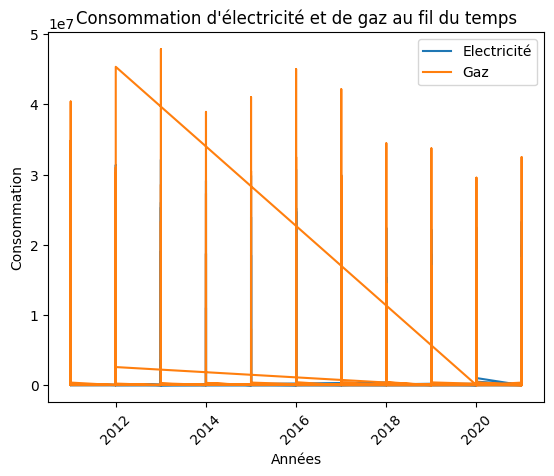

In [12]:
plt.plot(data_electricite.index, data_electricite['conso'], label='Electricité')
plt.plot(data_gaz.index, data_gaz['conso'], label='Gaz')
plt.xlabel('Années')
plt.ylabel('Consommation')
plt.title('Consommation d\'électricité et de gaz au fil du temps')
plt.legend()
plt.xticks(rotation=45)  # Rotation des étiquettes des années pour une meilleure lisibilité
plt.show()